# Jagwinder Singh

## Complete the notebook
(version 11/04/2020)

## Handling Missing Data

1) Complete the JupyterNotebook; try to work through it and avoid cut and paste solutions  
2) Place your name as a comment in at least 5 different random spots  
3) Upload the single, not zipped file

### What are the four ways to handle missing data (NaN)?
1) Ignore it  
2) Delete it  
3) Fill forward or backwards  
4) Replace it with something static  

### Why might you just ignore missing data?
You might want to just ignore missing data because of legal reasons, or just to maybe retain the absolute integrity of the data.

### What are the two choices when deleting NaN data?
1) All requires all data in the row to be NaN for you to delete it.  
2) You can also choose 'any' and then set a threshold. This threshold will require that many non-NA values to accept the row. 

### Loading the data and pickling it to start coding (Percent Change - Single Starting Point data set)
(run both code cell below)

In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('default') # Jagwinder Singh

In [2]:
api_key = open('quandlapikey.txt','r').read()

fifty_states = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
fifty_states = fifty_states[0]['Postal Code']
states = fifty_states

main_df = pd.DataFrame()

for abbv in states:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    df = df[['NSA Value']]
    df.rename(columns={'NSA Value':abbv}, inplace=True)
    df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)
            
main_df.to_pickle('fifty_states_raw_data.pickle')

### Resample a column

1) Read the pickle into a DataFrame named States_HPI_data, resample NV quarterly 'Q' (label the new column NVQtr).  
Show first 24 lines of the head (only NV and NVQtr)

In [3]:
States_HPI_data = pd.read_pickle('fifty_states_raw_data.pickle')
States_HPI_data['NVQtr'] = States_HPI_data['NV'].resample('Q').mean()
print(States_HPI_data[['NV','NVQtr']].head(24)) #Jagwinder Singh

                   NV      NVQtr
Date                            
1975-01-31   0.000000        NaN
1975-02-28   1.961581        NaN
1975-03-31   3.906894   1.956158
1975-04-30   5.772202        NaN
1975-05-31   7.411635        NaN
1975-06-30   8.701003   7.294947
1975-07-31   9.681971        NaN
1975-08-31  10.584426        NaN
1975-09-30  11.592769  10.619722
1975-10-31  12.719788        NaN
1975-11-30  13.951741        NaN
1975-12-31  15.210834  13.960788
1976-01-31  16.357543        NaN
1976-02-29  17.199887        NaN
1976-03-31  17.613644  17.057024
1976-04-30  17.713904        NaN
1976-05-31  17.711934        NaN
1976-06-30  17.840925  17.755588
1976-07-31  18.106657        NaN
1976-08-31  18.363707        NaN
1976-09-30  18.513348  18.327904
1976-10-31  18.651343        NaN
1976-11-30  18.995059        NaN
1976-12-31  19.676389  19.107597


2) Resample NV annually (label new column NVyrly).  
Show first 24 lines of the head (only NV, NVQtr and NVyrly)  
Graph NV, NVQtr and NVyrly TOGETHER, show legend

                   NV      NVQtr     NVyrly
Date                                       
1975-01-31   0.000000        NaN        NaN
1975-02-28   1.961581        NaN        NaN
1975-03-31   3.906894   1.956158        NaN
1975-04-30   5.772202        NaN        NaN
1975-05-31   7.411635        NaN        NaN
1975-06-30   8.701003   7.294947        NaN
1975-07-31   9.681971        NaN        NaN
1975-08-31  10.584426        NaN        NaN
1975-09-30  11.592769  10.619722        NaN
1975-10-31  12.719788        NaN        NaN
1975-11-30  13.951741        NaN        NaN
1975-12-31  15.210834  13.960788   8.457904
1976-01-31  16.357543        NaN        NaN
1976-02-29  17.199887        NaN        NaN
1976-03-31  17.613644  17.057024        NaN
1976-04-30  17.713904        NaN        NaN
1976-05-31  17.711934        NaN        NaN
1976-06-30  17.840925  17.755588        NaN
1976-07-31  18.106657        NaN        NaN
1976-08-31  18.363707        NaN        NaN
1976-09-30  18.513348  18.327904

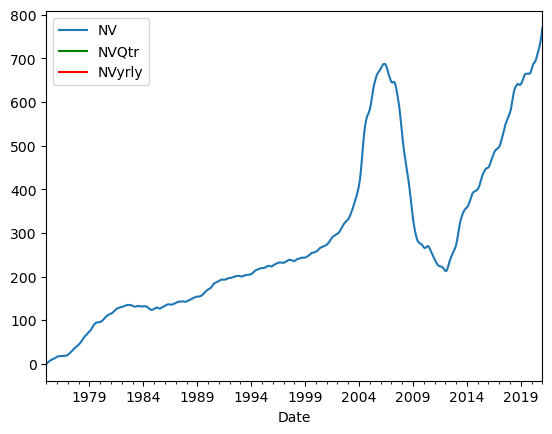

In [4]:
States_HPI_data['NVyrly'] = States_HPI_data['NV'].resample('A').mean()

print(States_HPI_data[['NV','NVQtr','NVyrly']].head(24))

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

States_HPI_data['NV'].plot(ax=ax1)
States_HPI_data['NVQtr'].plot(color='g',ax=ax1, label='NVQtr')
States_HPI_data['NVyrly'].plot(color='r',ax=ax1, label='NVyrly')
plt.legend()
plt.show() #Jagwinder Singh

# Delete the NaNs

3) Write the code to delete the NaNs  
Show first 24 lines of the head (only NV, NVQtr and NVyrly)  
Graph NV, NVQtr and NVyrly TOGETHER, show legend

                    NV       NVQtr      NVyrly
Date                                          
1975-12-31   15.210834   13.960788    8.457904
1976-12-31   19.676389   19.107597   18.062028
1977-12-31   42.307901   40.503398   31.855675
1978-12-31   72.467059   69.956276   58.637922
1979-12-31   95.714323   95.395221   88.054965
1980-12-31  114.358722  113.421341  105.820581
1981-12-31  130.159103  129.440457  123.835123
1982-12-31  134.068651  134.597946  133.698067
1983-12-31  131.744417  131.801773  132.106124
1984-12-31  124.911340  124.407714  128.279248
1985-12-31  132.189425  131.040941  128.544898
1986-12-31  138.365382  137.632863  136.106558
1987-12-31  142.376180  142.539753  142.260037
1988-12-31  154.027044  153.259255  148.776437
1989-12-31  169.343079  167.440947  159.622620
1990-12-31  188.877219  187.888227  180.262532
1991-12-31  196.612970  195.961313  193.458702
1992-12-31  201.589487  201.748907  199.718673
1993-12-31  204.808647  204.548691  202.813333
1994-12-31  2

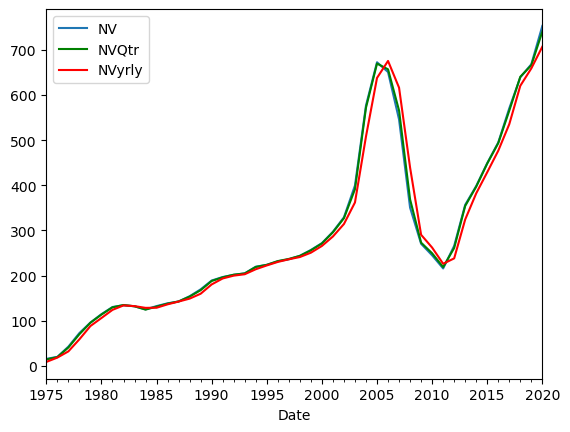

In [5]:
States_HPI_data.dropna(inplace=True) 
print(States_HPI_data[['NV','NVQtr','NVyrly']].head(24))

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

States_HPI_data['NV'].plot(ax=ax1)
States_HPI_data['NVQtr'].plot(color='g',ax=ax1, label='NVQtr')
States_HPI_data['NVyrly'].plot(color='r',ax=ax1, label='NVyrly')
plt.legend()
plt.show() # Jagwinder Singh

4) In viewing the output of #3, what time frame (ie. weekly, yearly...etc.) is the output in?  
The output is yearly/annually.

5) Why in your answer to #4, is it that way?  
It's yearly because that's the row that all colunms have data and no NaN values.

# Fill Forward

6) Reload the raw data from the pickle  
Resample OK annually (label new column OKyrly)  
Replace all the NaNs using the fill foward process  
Show first 24 lines of the head (only OK and OKyrly)  
Graph FL and FLyrly TOGETHER, show legend

                   OK    OKyrly
Date                           
1975-01-31   0.000000       NaN
1975-02-28  -0.527729       NaN
1975-03-31  -0.913448       NaN
1975-04-30  -1.230196       NaN
1975-05-31  -1.463087       NaN
1975-06-30  -1.485614       NaN
1975-07-31  -1.225588       NaN
1975-08-31  -0.715077       NaN
1975-09-30  -0.055674       NaN
1975-10-31   0.772579       NaN
1975-11-30   1.756813       NaN
1975-12-31   2.700460 -0.198880
1976-01-31   3.432812 -0.198880
1976-02-29   4.111439 -0.198880
1976-03-31   4.825742 -0.198880
1976-04-30   5.488825 -0.198880
1976-05-31   6.184170 -0.198880
1976-06-30   7.082106 -0.198880
1976-07-31   8.069590 -0.198880
1976-08-31   9.011637 -0.198880
1976-09-30   9.897451 -0.198880
1976-10-31  10.633254 -0.198880
1976-11-30  11.103676 -0.198880
1976-12-31  11.397679  7.603198


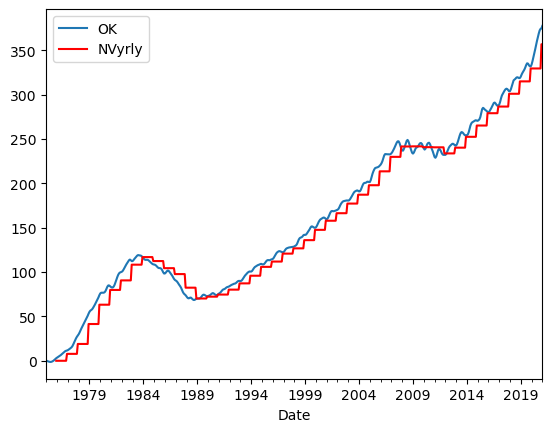

In [6]:
States_HPI_data = pd.read_pickle('fifty_states_raw_data.pickle')
States_HPI_data['OKyrly'] = States_HPI_data['OK'].resample('A').mean()

States_HPI_data.fillna(method='ffill',inplace=True)
print(States_HPI_data[['OK','OKyrly']].head(24))

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

States_HPI_data['OK'].plot(ax=ax1)
States_HPI_data['OKyrly'].plot(color='r',ax=ax1, label='NVyrly')
plt.legend()
plt.show() # Jagwinder Singh

7) What happened in the Fill Forward?  
It filled the data forward, so the data for DECEMBER filled the upcoming months till next DECEMBER.

# Fill Backward


8) Reload the raw data from the pickle  
Resample LA annually (label new column LAyrly)  
Replace all the NaNs using the fill Backward process  
Show first 24 lines of the head (only LA and LAyrly)  
Graph LA and LAyrly show legend

                   LA     LAyrly
Date                            
1975-01-31   0.000000   5.040844
1975-02-28   1.243536   5.040844
1975-03-31   2.566026   5.040844
1975-04-30   3.618007   5.040844
1975-05-31   4.175505   5.040844
1975-06-30   4.538102   5.040844
1975-07-31   5.205395   5.040844
1975-08-31   6.211323   5.040844
1975-09-30   7.177590   5.040844
1975-10-31   7.920304   5.040844
1975-11-30   8.549176   5.040844
1975-12-31   9.285164   5.040844
1976-01-31  10.117481  14.679437
1976-02-29  10.943288  14.679437
1976-03-31  11.821764  14.679437
1976-04-30  12.864315  14.679437
1976-05-31  13.845025  14.679437
1976-06-30  14.407235  14.679437
1976-07-31  14.828970  14.679437
1976-08-31  15.570916  14.679437
1976-09-30  16.518171  14.679437
1976-10-31  17.518716  14.679437
1976-11-30  18.482102  14.679437
1976-12-31  19.235261  14.679437


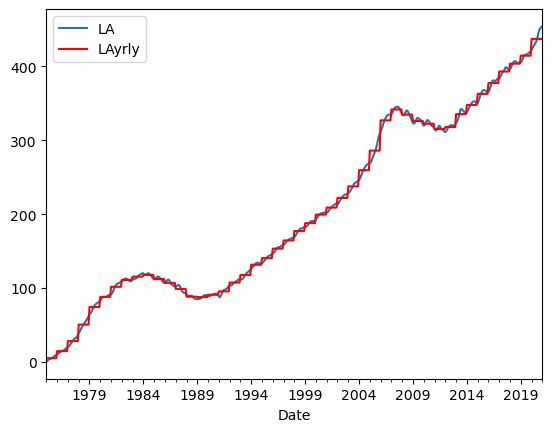

In [7]:
States_HPI_data = pd.read_pickle('fifty_states_raw_data.pickle')
States_HPI_data['LAyrly'] = States_HPI_data['LA'].resample('A').mean()

States_HPI_data.fillna(method='bfill',inplace=True)
print(States_HPI_data[['LA','LAyrly']].head(24))

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

States_HPI_data['LA'].plot(ax=ax1)
States_HPI_data['LAyrly'].plot(color='r',ax=ax1, label='LAyrly')
plt.legend()
plt.show() # Jagwinder Singh

9) What happened in the Fill Backward?  
It filled the data backward, so the data for DECEMBER filled the previous months till previous DECEMBER.

# Replacing the data

10) Reload the raw data from the pickle  
Resample CA annually (label new column CAyrly)  
Replace all the NaNs with -88888888  
Show first 24 lines of the head (only CA and CAyrly)  
** Do Not Graph CA and CAyrly - This graph will be look ridiculous and offer no data insight

                   CA        CAyrly
Date                               
1975-01-31   0.000000 -8.888889e+07
1975-02-28   0.431478 -8.888889e+07
1975-03-31   1.672205 -8.888889e+07
1975-04-30   3.649824 -8.888889e+07
1975-05-31   5.236042 -8.888889e+07
1975-06-30   5.848468 -8.888889e+07
1975-07-31   6.533059 -8.888889e+07
1975-08-31   7.999937 -8.888889e+07
1975-09-30   9.611476 -8.888889e+07
1975-10-31  10.878219 -8.888889e+07
1975-11-30  11.771968 -8.888889e+07
1975-12-31  12.741287  6.364497e+00
1976-01-31  13.984946 -8.888889e+07
1976-02-29  15.253547 -8.888889e+07
1976-03-31  16.892187 -8.888889e+07
1976-04-30  18.771653 -8.888889e+07
1976-05-31  20.229695 -8.888889e+07
1976-06-30  21.672138 -8.888889e+07
1976-07-31  23.534512 -8.888889e+07
1976-08-31  25.474413 -8.888889e+07
1976-09-30  27.191118 -8.888889e+07
1976-10-31  28.909599 -8.888889e+07
1976-11-30  31.108708 -8.888889e+07
1976-12-31  33.414064  2.303638e+01


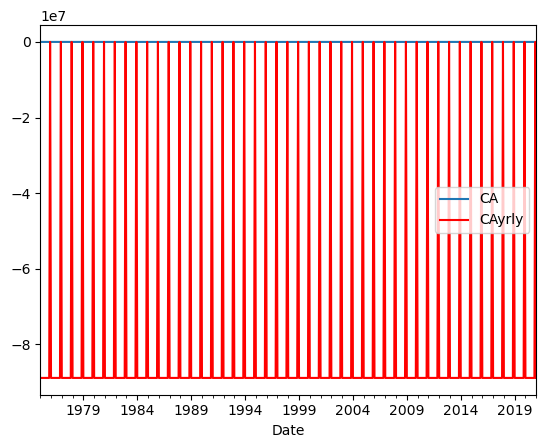

In [8]:
States_HPI_data = pd.read_pickle('fifty_states_raw_data.pickle')
States_HPI_data['CAyrly'] = States_HPI_data['CA'].resample('A').mean()

States_HPI_data.fillna(value=-88888888,inplace=True)
print(States_HPI_data[['CA','CAyrly']].head(24))

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

States_HPI_data['CA'].plot(ax=ax1)
States_HPI_data['CAyrly'].plot(color='r',ax=ax1, label='CAyrly')
plt.legend()
plt.show() # Jagwinder Singh